In [1]:
from model import GroceryModel
import networkx as nx
import matplotlib.pyplot as plt
import json

In [2]:
config = {
    "height": 11,
    "width": 11,
    "n_persons": 3,
    "n_items": 1,
    "grid_layout": "grids/subgrid_11x11.txt", 
    "avg_arrival": 10,
    "n_steps": 100,
    "speed_dist": [[3, 2], [0.5, 0.5]], # [[speed], [chances]]
    "familiar_dist": [[1, 0.6], [0.75, 0.25]]
}

# with open('config1.json', 'w') as f:
#     json.dump(config, f)

In [3]:
model = GroceryModel(config)

In [4]:
model.run_model()

0 | arrival_times: [0, 8, 23]
arriving!
chose speed: 3 and familiar: 1
Originally Person 9 has objs ['bread', 'chicken', 'drinks', 'exit']
After sorting person 9 has objs [('bread', (6, 3)), ('drinks', (5, 1)), ('chicken', (1, 3)), ('exit', (1, 10))]
Person 9 at (9, 10) has current obj bread at (6, 3)
planned move: [(9, 9), (9, 8), (9, 7)]
1 | arrival_times: [0, 8, 23]
Person 9 at (9, 7) has current obj bread at (6, 3)
planned move: [(9, 6), (8, 6), (8, 5)]
2 | arrival_times: [0, 8, 23]
Person 9 at (8, 5) has current obj bread at (6, 3)
planned move: [(7, 5), (7, 4), (6, 4)]
3 | arrival_times: [0, 8, 23]
Person 9 at (6, 4) has current obj bread at (6, 3)
planned move: [(6, 3)]
Person 9 at (6, 3) got bread!


getting next objective: ('drinks', (5, 1))
4 | arrival_times: [0, 8, 23]
Person 9 at (6, 3) has current obj drinks at (5, 1)
planned move: [(6, 2), (5, 2), (5, 1)]
Person 9 at (5, 1) got drinks!


getting next objective: ('chicken', (1, 3))
5 | arrival_times: [0, 8, 23]
Person 9 at

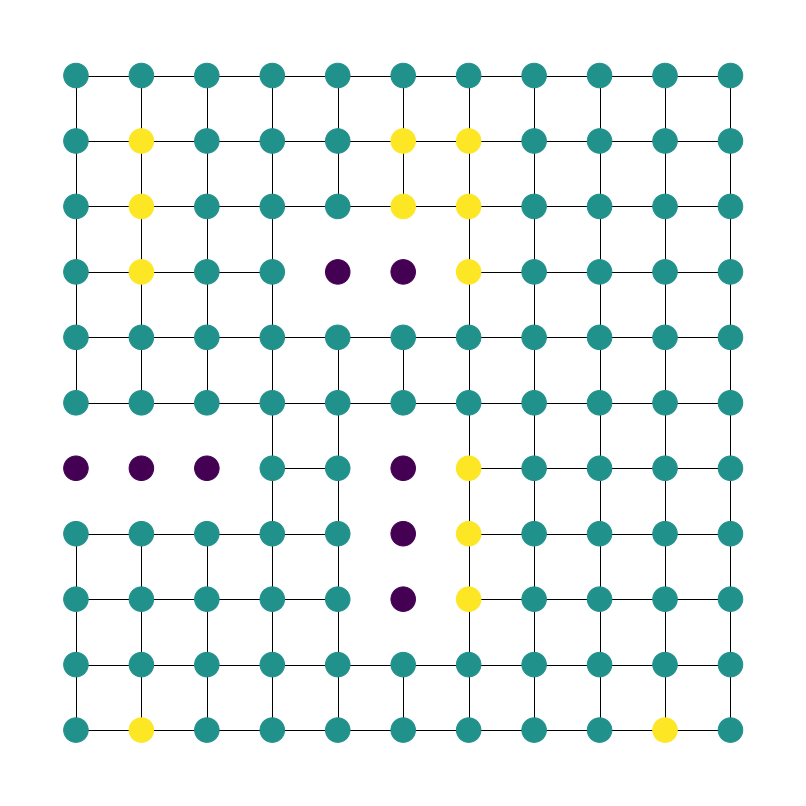

In [5]:
g = model.graph

plt.figure(figsize=(config["width"], config["height"]))
pos = {(x,y):(x,-y) for x,y in g.nodes()}

val_map = {}
for x, y in pos:
#     if x == 0 or x == config["width"]-1 or y == 0 or y == config["height"]-1:
#         val_map[(x,y)] = 0.0
        
    for coords in model.objectives.values():
        if (x,y) in coords:
            val_map[(x,y)] = 0.5
            
    if (x,y) in [obj.pos for obj in model.obstacles]:
        val_map[(x,y)] = 0.0
        
values = [val_map.get(node, 0.25) for node in g.nodes()]

nx.draw(g, pos=pos, 
        node_color=values, 
        node_size=600)

In [6]:
# print(g.edges)

In [7]:
data = model.datacollector.get_model_vars_dataframe()

In [8]:
print(data)

    persons              person_locs steps_in_stores      speed  \
0         1                [(9, 10)]             [0]        [3]   
1         1                 [(9, 7)]             [1]        [3]   
2         1                 [(8, 5)]             [2]        [3]   
3         1                 [(6, 4)]             [3]        [3]   
4         1                 [(6, 3)]             [4]        [3]   
5         1                 [(5, 1)]             [5]        [3]   
6         1                 [(2, 1)]             [6]        [3]   
7         1                 [(1, 3)]             [7]        [3]   
8         2        [(2, 5), (9, 10)]          [8, 0]     [3, 3]   
9         2       [(3, 7), (10, 10)]          [9, 1]     [3, 3]   
10        2       [(2, 9), (10, 10)]         [10, 2]     [3, 3]   
11        1          [None, (9, 10)]         [10, 3]     [3, 3]   
12        1           [None, (9, 7)]         [10, 4]     [3, 3]   
13        1           [None, (9, 4)]         [10, 5]     [3, 3